# CLTV Estimation with BG-NBD and Gamma-Gamma (BG-NBD ve Gamma-Gamma ile CLTV Tahmini)

## Business Problem (İş Problemi)

- **A UK-based retail company wants to determine a roadmap for its sales and marketing activities. In order for the company to make medium-long term plans, it is necessary to estimate the potential value that existing customers will provide to the company in the future.**

  - *(İngiltere merkezli perakende şirketi satış ve pazarlama faaliyetleri için roadmap belirlemek istemektedir. Şirketin orta uzun vadeli plan yapabilmesi için var olan müşterilerin gelecekte şirkete sağlayacakları potansiyel değerin tahmin edilmesi gerekmektedir.)*

## Data Set Story (Veri Seti Hikayesi)

- **The dataset named "Online Retail II" contains online sales transactions of a UK-based retail company between 01/12/2009 and 09/12/2011. The company's product catalog includes gift items, and it is known that most of its customers are wholesalers.**

  - (*Online Retail II isimli veri seti İngiltere merkezli bir perakende şirketinin  01/12/2009 - 09/12/2011 tarihleri arasındaki online satış işlemlerini içeriyor. Şirketin ürün kataloğunda hediyelik eşyalar yer almaktadır ve çoğu müşterisinin toptancı olduğu bilgisi mevcuttur.*)

- **InvoiceNO** : *If this code starts with C, it means that the transaction has been cancelled* (Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder)

- **StockCode** : *Unique code for each product* (Her bir ürün için eşşiz kod)

- **Description** : *Product Name* (Ürün İsmi)

- **Quantity** : *How many of the products on the invoices were sold* (Faturalardaki ürünlerden kaçar tane satıldığı)

- **InvoiceDate** : (Fatura Tarihi)

- **UnitPrice** : *Invoice price in sterling* (Sterlin Cinsinden Fatura Fiyatı)

- **CustomerID** : *Unique Customer Numbers* (Eşsiz müşteri Numaraları)

- **Country** : (Ülke)

## Project Tasks (Proje Görevleri)

### 1. Task (1. Görev): Predicting 6-Month CLTV by Establishing BG-NBD and Gamma-Gamma Models (BG-NBD ve Gamma-Gamma Modellerini Kurarak 6 Aylık CLTV Tahmini Yapılması)

---

- **Step 1:** *Estimate 6-month CLTV for UK customers using data from 2010-2011*

  - (**Adım 1:** *2010-2011 yıllarındaki veriyi kullanarak İngiltere’deki müşteriler için 6 aylık CLTV tahmini yapınız*)
 
---

- **Step 2:** *Interpret and evaluate the results you get.*

  - (**Adım 2:** *Elde ettiğiniz sonuçları yorumlayıp, değerlendiriniz*)
 
---

### 2. Task (2. Görev): CLTV Analysis Consisting of Different Time Periods (Farklı Zaman Periyotlarından Oluşan CLTV Analizi)

---

- **Step 1:** *Calculate 1-month and 12-month CLTV for 2010-2011 UK customers.*

  - (**Adım 1:** *2010-2011 UK müşterileri için 1 aylık ve 12 aylık CLTV hesaplayınız.*)

---

- **Step 2:** *Analyze the 10 people with the highest CLTV in 1 month and the 10 people with the highest CLTV in 12 months.*

  - (**Adım 2:** *1 aylık CLTV'de en yüksek olan 10 kişi ile 12 aylık'taki en yüksek 10 kişiyi analiz ediniz*)

---

### 3. Task (3. Görev): Segmentation and Action Recommendations (Segmentasyon ve Aksiyon Önerileri)

---

- **Step 1:** *For 2010-2011 UK customers, divide all your customers into 4 groups (segments) according to 6-month CLTV and add the group names to the data set.*

  - (**Adım 1:** *2010-2011 UK müşterileri için 6 aylık CLTV'ye göre tüm müşterilerinizi 4 gruba (segmente) ayırınız ve grup isimlerini veri setine  ekleyiniz.*)
 
---

- **Step 2:** *Make brief 6-month action suggestions to the management for 2 groups you choose among 4 groups.*

  - (**Adım 2:** *4 grup içerisinden seçeceğiniz 2 grup için yönetime kısa kısa 6 aylık aksiyon önerilerinde bulununuz.*)
 
---

## Solution (Çözüm)

#### Required Libraries and Functions (Gerekli Kütüphaneler ve Fonksiyonlar)

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
def outlier_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    quartile1 = dataframe[variable].quantile(q1)
    quartile3 = dataframe[variable].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

In [4]:
def count_outliers(dataframe, variable, q1=0.25, q3=0.75):
    up_limit, low_limit = outlier_thresholds(dataframe, variable, q1, q3)
    outliers = dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)]
    return outliers.shape[0]

In [5]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    up_limit, low_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

#### Reading Data (Veri Okuma)

In [6]:
df_ = pd.read_excel("C:\\Users\\Ruzgiiiar\\Desktop\\Miuul Makine Ogrenimi\\Miuul CRM - RFM\\CLTV Prediction\\Çalışma\\CLTV_Prediction\\online_retail_II.xlsx",
                    sheet_name='Year 2010-2011')

In [7]:
df = df_.copy()

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [9]:
def check_df(dataframe, head=5):
    print('################# shape #################')
    print(dataframe.shape)
    print('################# head ##################')
    print(dataframe.head())
    print('################# tail #################')
    print(dataframe.tail())
    print('################# dtypes #################')
    print(dataframe.info())
    print('################# NA #################')
    print(dataframe.isnull().sum())
    print('################# describe #################')
    numeric_col = dataframe[[col for col in dataframe.columns if df[col].dtypes in ['int64', 'float64']]]
    print(numeric_col.describe().T)
    print('################# Quantile #################')
    print(numeric_col.quantile([0.05, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T)

In [10]:
check_df(df)

################# shape #################
(541910, 8)
################# head ##################
  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00  2.550    17850.000  United Kingdom
1  536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00  3.390    17850.000  United Kingdom
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00  2.750    17850.000  United Kingdom
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00  3.390    17850.000  United Kingdom
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00  3.390    17850.000  United Kingdom
################# tail #################
       Invoice StockCode                      Description  Quantity         InvoiceDate  Price  Customer ID Country
541905  5

#### Data Pre-Processing (Veri ön işleme)

In [11]:
df.dropna(inplace=True)

In [12]:
df = df[~df['Invoice'].str.contains('C', na=False)]

In [13]:
df = df[df['Quantity'] > 0]

In [14]:
df = df[df['Price'] > 0]

In [15]:
num_cols = ['Price', 'Quantity']

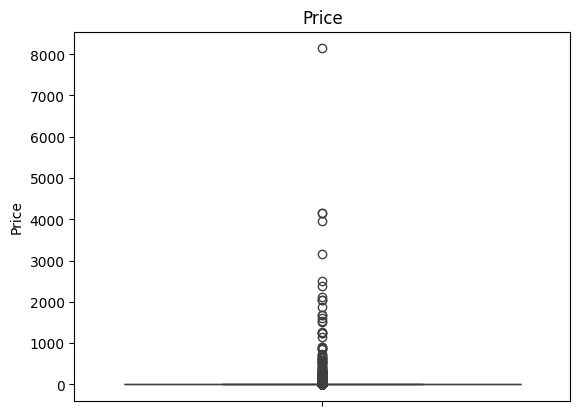

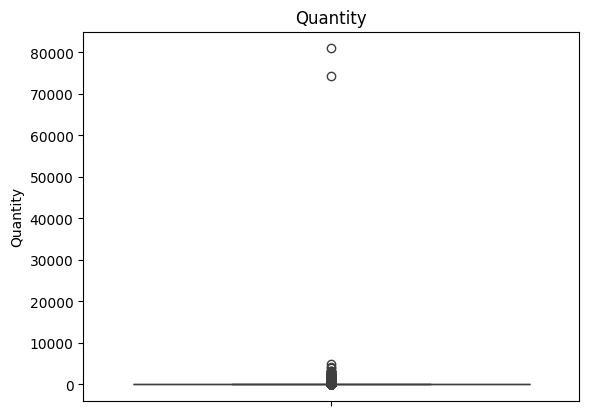

In [16]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

In [17]:
df.shape

(397885, 8)

In [18]:
# % 75
for col in num_cols:
    count= count_outliers(df, col)
    print('########', col, '########')
    print('Outliers:', count)
    print('Ratio to number of observations:', (count / df.shape[0] * 100))
    print('---------------------------------------------------------------------')

######## Price ########
Outliers: 34357
Ratio to number of observations: 8.634907071138645
---------------------------------------------------------------------
######## Quantity ########
Outliers: 25647
Ratio to number of observations: 6.445832338489764
---------------------------------------------------------------------


In [19]:
# % 90
for col in num_cols:
    count= count_outliers(df, col, q1=0.1, q3=0.9)
    print('########', col, '########')
    print('Outliers:', count)
    print('Ratio to number of observations:', (count / df.shape[0] * 100))
    print('---------------------------------------------------------------------')

######## Price ########
Outliers: 3500
Ratio to number of observations: 0.8796511554846249
---------------------------------------------------------------------
######## Quantity ########
Outliers: 11529
Ratio to number of observations: 2.8975709061663544
---------------------------------------------------------------------


In [20]:
# % 99
for col in num_cols:
    count= count_outliers(df, col, q1=0.01, q3=0.99)
    print('########', col, '########')
    print('Outliers:', count)
    print('Ratio to number of observations:', (count / df.shape[0] * 100))
    print('---------------------------------------------------------------------')

######## Price ########
Outliers: 661
Ratio to number of observations: 0.1661284039358106
---------------------------------------------------------------------
######## Quantity ########
Outliers: 962
Ratio to number of observations: 0.24177840330748837
---------------------------------------------------------------------


In [21]:
for col in num_cols:
    replace_with_thresholds(df, col, q1=0.01, q3=0.99)

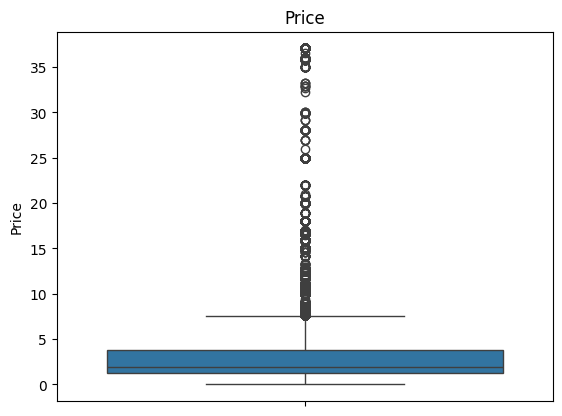

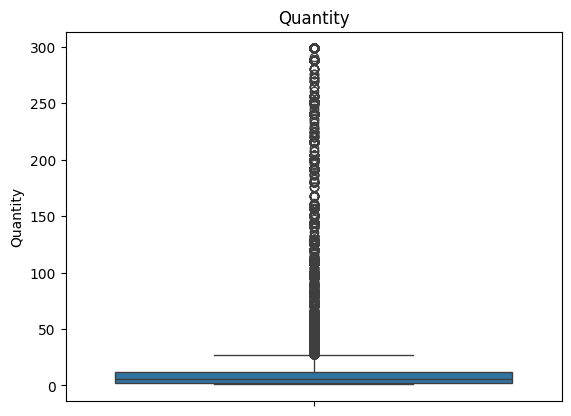

In [22]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

In [23]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [24]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [25]:
today_date = dt.datetime(2011, 12, 11)

#### Preparation of Lifetime data structure (Lifetime Veri Yapısının Hazırlanması)

- **recency:** Time since last purchase. (Weekly and user specific)

  - (Son satın alma üzerinden geçen zaman. ((Son satin alma - ilk satin alma)Haftalık olarak ve kullanıcı özelinde))
---
- **T:** The customer's age in weeks. How long before the date of analysis was the first purchase made?

  - (Haftalık cinsinden müşterinin yaşı. Analiz tarihinden ne kadar süre önce ilk satın alma yapılmış ?)
---
- **frequency:** Total number of recurring purchases

  - (Tekrar eden toplam satın alma sayısı.)
---
- **monetary:** Average earnings per purchase

  - (Satın alma başına ortalama kazanç.)

In [26]:
cltv_df = df.groupby('Customer ID').agg(
    {'InvoiceDate': [lambda x: (x.max() - x.min()).days, # recency
                     lambda x: (today_date - x.min()).days], # T
     'Invoice': lambda x: x.nunique(), # frequency
     'TotalPrice': lambda x: x.sum()}) # monetary

In [27]:
cltv_df

InvoiceDate             Invoice TotalPrice
             <lambda_0> <lambda_1> <lambda>   <lambda>
Customer ID                                           
12346.000             0        326        1    310.440
12347.000           365        368        7   4310.000
12348.000           282        359        4   1770.780
12349.000             0         19        1   1491.720
12350.000             0        311        1    331.460
...                 ...        ...      ...        ...
18280.000             0        278        1    180.600
18281.000             0        181        1     80.820
18282.000           118        127        2    178.050
18283.000           333        338       16   2094.880
18287.000           158        202        3   1837.280

[4338 rows x 4 columns]

In [28]:
cltv_df.columns = cltv_df.columns.droplevel(0)

In [29]:
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']

In [30]:
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.000,0,326,1,310.440
12347.000,365,368,7,4310.000
12348.000,282,359,4,1770.780
12349.000,0,19,1,1491.720
12350.000,0,311,1,331.460


In [31]:
cltv_df['monetary'] = cltv_df['monetary'] / cltv_df['frequency']

In [32]:
cltv_df['recency'] = cltv_df['recency'] / 7

In [33]:
cltv_df['T'] = cltv_df['T'] / 7

In [34]:
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

In [35]:
cltv_df

,recency,T,frequency,monetary
Customer ID,,,,
12347.000,52.143,52.571,7,615.714
12348.000,40.286,51.286,4,442.695
12352.000,37.143,42.429,8,219.543
12356.000,43.143,46.571,3,937.143
12358.000,21.286,21.571,2,575.210
...,...,...,...,...
18272.000,34.857,35.286,6,513.097
18273.000,36.429,36.857,3,68.000
18282.000,16.857,18.143,2,89.025


#### Establishing the BG-NBD Model (BG-NBD Modelinin Kurulması)

In [36]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

In [37]:
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.41, b: 2.49, r: 2.18>

- **10 customers with the most expected purchases in 1 month.**
  - (1 ayda en çok satın alma beklenen 10 müşteri)

In [38]:
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

Customer ID
12748.000   12.963
14911.000   12.472
17841.000    7.740
13089.000    6.133
14606.000    5.840
15311.000    5.719
12971.000    5.413
14646.000    4.812
13408.000    3.934
18102.000    3.864
dtype: float64

- **The company's expected total sales in 1 month.**
  - (Şirketin 1 ayda beklenen toplam satışları)

In [39]:
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

1776.8934732202933

- **10 customers with the most expected purchases in 3 month.**
  - (3 ayda en çok satın alma beklenen 10 müşteri)

In [40]:
bgf.predict(4*3,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

Customer ID
12748.000   38.628
14911.000   37.164
17841.000   23.062
13089.000   18.274
14606.000   17.401
15311.000   17.041
12971.000   16.129
14646.000   14.334
13408.000   11.722
18102.000   11.511
dtype: float64

- **The company's expected total sales in 3 month.**
  - (Şirketin 3 ayda beklenen toplam satışları)

In [41]:
bgf.predict(4*3,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

5271.112433826356

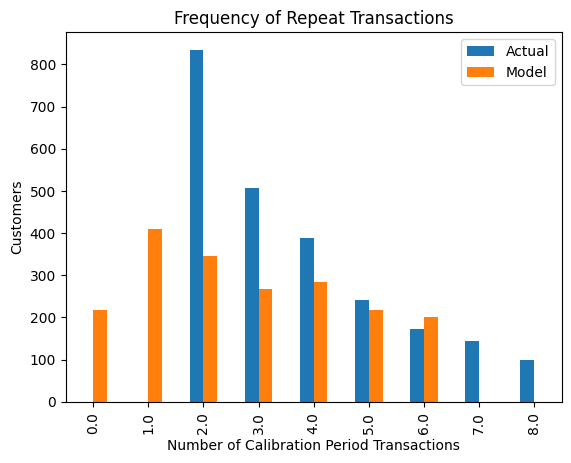

In [42]:
plot_period_transactions(bgf)
plt.show()

#### Establishing the 'Gamma - Gamma' Model (Gamma - Gamma Modelinin Kurulması)

In [43]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

In [44]:
ggf.fit(cltv_df['frequency'],
        cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 3.79, q: 0.34, v: 3.73>

- **10 customers expected to generate the most profit**
  - (En fazla karı elde etmesi beklenen 10 müşteri)

In [45]:
ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).sort_values(ascending=False).head(10)

Customer ID
12415.000   5772.178
12590.000   5029.420
12435.000   4288.944
12409.000   3918.813
14088.000   3917.130
18102.000   3870.997
12753.000   3678.578
14646.000   3654.815
15749.000   3216.052
14096.000   3196.436
dtype: float64

### 1. Task (1. Görev): Predicting 6-Month CLTV by Establishing BG-NBD and Gamma-Gamma Models (BG-NBD ve Gamma-Gamma Modellerini Kurarak 6 Aylık CLTV Tahmini Yapılması)

---

- **Step 1:** *Estimate 6-month CLTV for UK customers using data from 2010-2011*

  - (**Adım 1:** *2010-2011 yıllarındaki veriyi kullanarak İngiltere’deki müşteriler için 6 aylık CLTV tahmini yapınız*)

---

In [126]:
def cltv_p(dataframe, month=6):

    cltv_df = dataframe.groupby('Customer ID').agg(
        {'InvoiceDate': [lambda x: (x.max() - x.min()).days,
                         lambda x: (today_date - x.min()).days],
        'Invoice': lambda x: x.nunique(),
        'TotalPrice': lambda x: x.sum()})

    cltv_df.columns = cltv_df.columns.droplevel(0)
    cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
    cltv_df['monetary'] = cltv_df['monetary'] / cltv_df['frequency']
    cltv_df = cltv_df[(cltv_df['frequency'] > 1)]
    cltv_df['recency'] = cltv_df['recency'] / 7
    cltv_df['T'] = cltv_df['T'] / 7

    # 2. BG-NBD Modelinin Kurulmasi
    bgf = BetaGeoFitter(penalizer_coef = 0.001)
    bgf.fit(cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T'])

   
    # 3. GAMMA-GAMMA Modelinin Kurulmasi
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'],
            cltv_df['monetary'])


    # 4. BG-NBD ve GG Modeli ile CLTV'nin Hesaplanmasi
    cltv = ggf.customer_lifetime_value(bgf,
                                       cltv_df['frequency'],
                                       cltv_df['recency'],
                                       cltv_df['T'],
                                       cltv_df['monetary'],
                                       time=month, # 3 aylik
                                       freq='W', # T'nin frekans bilgisi.
                                       discount_rate=0.01)

    return cltv_df, cltv

In [127]:
df['Country'].unique()

array(['UK', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway',
       'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands',
       'Denmark', 'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece',
       'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [128]:
df.loc[(df['Country'] == 'United Kingdom'), 'Country'] = 'UK'

In [129]:
df_UK = df[df['Country'].str.contains('UK')]

In [130]:
df_UK.shape

(354321, 9)

In [131]:
cltv_UK_df, cltv_UK_6_month = cltv_p(df_UK, month=6)

In [132]:
cltv_UK_6_month.nunique()

2570

In [133]:
cltv_UK_6_month

Customer ID
12747.000    1937.035
12748.000   12395.362
12749.000    3450.678
12820.000     631.958
12822.000    1612.262
               ...   
18272.000    2225.480
18273.000     187.890
18282.000     325.433
18283.000     983.330
18287.000    1918.199
Name: clv, Length: 2570, dtype: float64

In [134]:
cltv_UK_df

,recency,T,frequency,monetary
Customer ID,,,,
12747.000,52.286,52.857,11,381.455
12748.000,53.143,53.429,209,154.930
12749.000,29.857,30.571,5,815.588
12820.000,46.143,46.714,4,235.585
12822.000,2.286,12.571,2,474.440
...,...,...,...,...
18272.000,34.857,35.286,6,513.097
18273.000,36.429,36.857,3,68.000
18282.000,16.857,18.143,2,89.025


---

- **Step 2:** *Interpret and evaluate the results you get.*

  - (**Adım 2:** *Elde ettiğiniz sonuçları yorumlayıp, değerlendiriniz*)
 
---

In [135]:
cltv_UK_6_month = cltv_UK_6_month.reset_index()

In [136]:
cltv_6_month_final = cltv_UK_df.merge(cltv_UK_6_month, on='Customer ID', how='left')

In [137]:
cltv_6_month_final.sort_values(by='clv', ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,clv
2486,18102.000,52.286,52.571,60,3859.739,92215.234
589,14096.000,13.857,14.571,17,3163.588,55726.778
2184,17450.000,51.286,52.571,46,2863.275,52846.108
2213,17511.000,52.857,53.429,31,2933.943,36947.208
1804,16684.000,50.429,51.286,28,2209.969,26146.294
406,13694.000,52.714,53.429,50,1275.700,25224.935
587,14088.000,44.571,46.143,13,3864.555,25041.839
1485,16000.000,0.000,0.429,3,2335.120,23975.522
1173,15311.000,53.286,53.429,91,667.779,23597.165
133,13089.000,52.286,52.857,97,606.362,22971.584


In [138]:
cltv_6_month_final.describe([0.05, 0.25, 0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,60%,70%,75%,80%,85%,90%,95%,99%,max
Customer ID,2570.000,15553.686,1576.366,12747.000,13079.900,14206.000,15575.500,16116.600,16672.600,16926.250,17190.200,17449.650,17705.100,17992.650,18228.310,18287.000
recency,2570.000,28.549,16.244,0.000,2.286,14.429,29.857,35.143,39.714,42.714,45.886,48.714,50.429,51.714,52.616,53.286
T,2570.000,37.078,14.743,0.429,7.636,28.179,40.571,44.571,47.857,51.286,51.857,52.429,52.714,53.286,53.429,53.429
frequency,2570.000,5.952,8.403,2.000,2.000,2.000,4.000,4.000,6.000,6.000,7.000,9.000,12.000,17.000,37.000,209.000
monetary,2570.000,346.030,283.005,3.450,97.665,187.216,290.191,330.649,379.616,416.312,459.001,510.568,598.922,772.660,1513.889,3864.555
clv,2570.000,1528.112,3156.865,0.000,120.686,498.481,954.562,1178.088,1483.893,1705.695,1921.801,2292.748,2884.816,3956.918,12360.180,92215.234


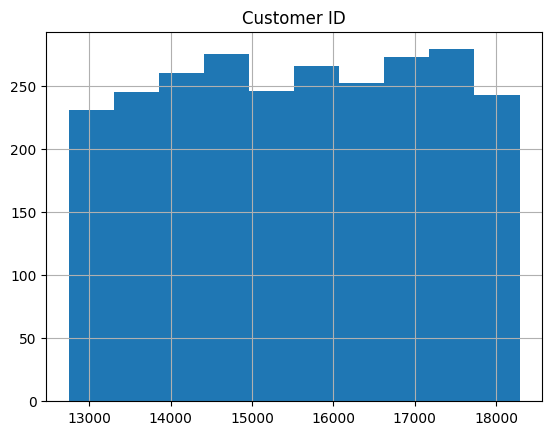

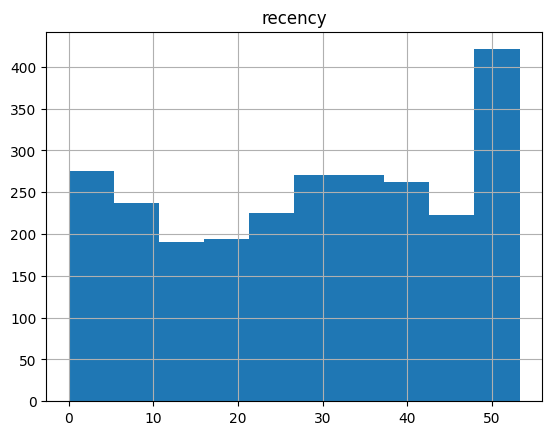

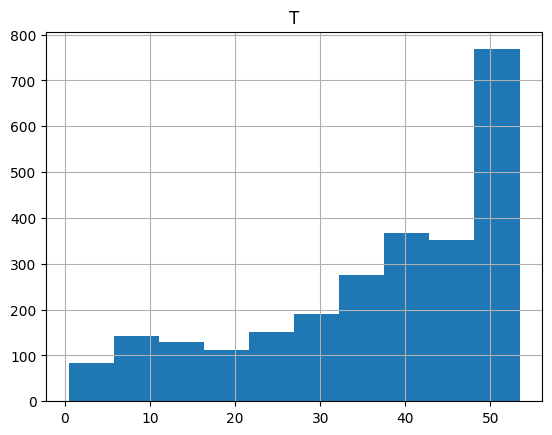

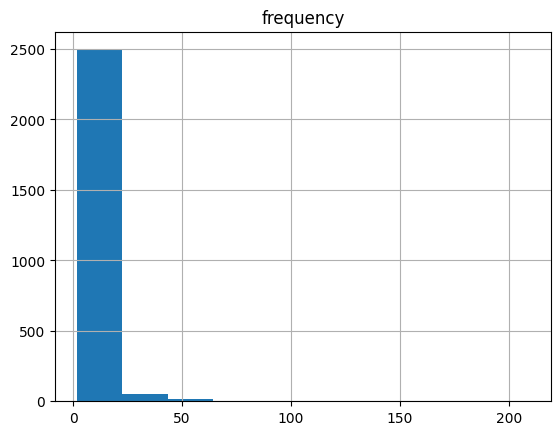

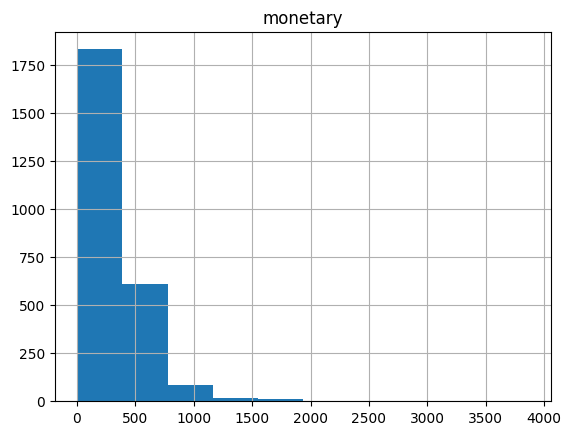

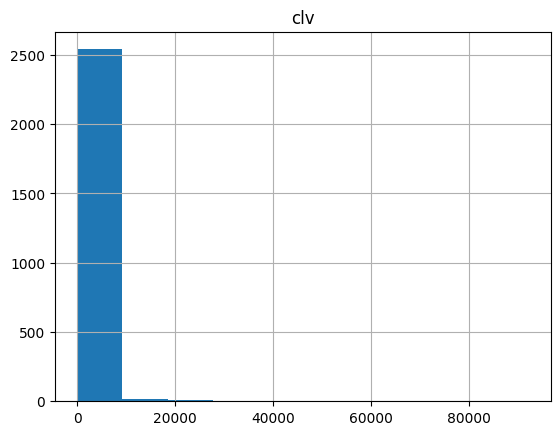

In [139]:
for col in cltv_6_month_final.columns:
    plt.title(col)
    cltv_6_month_final[col].hist()
    plt.show()

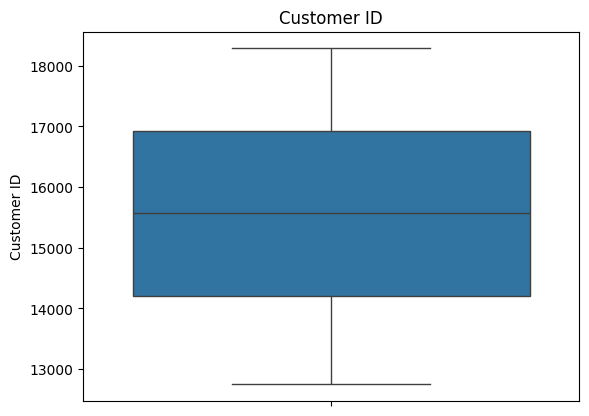

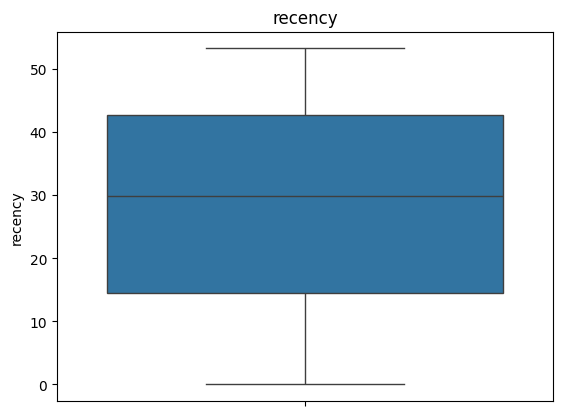

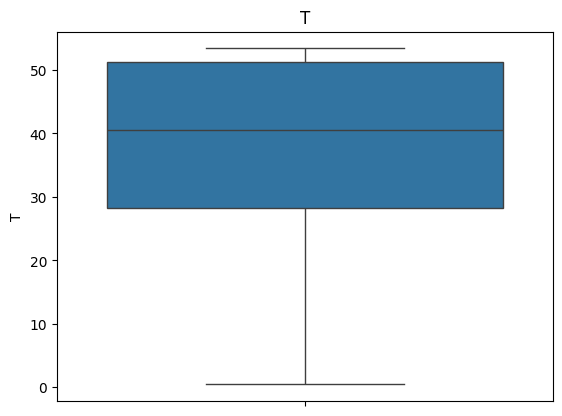

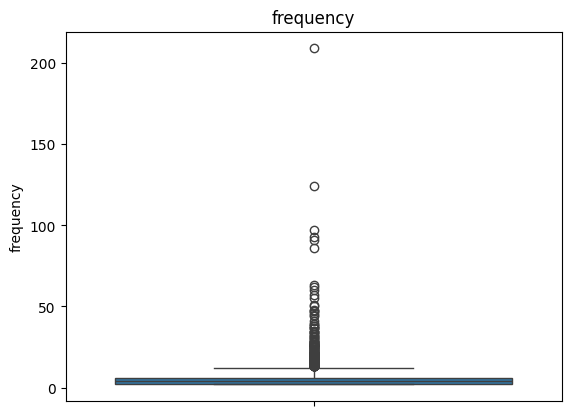

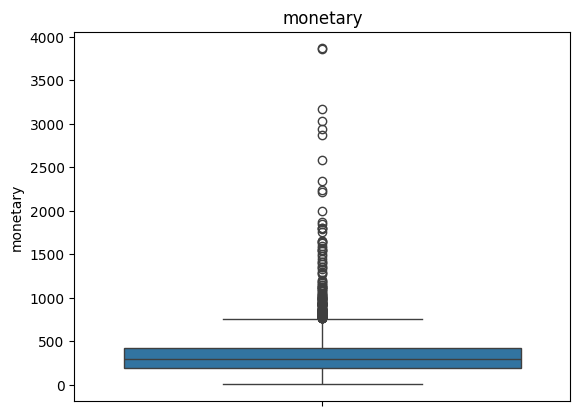

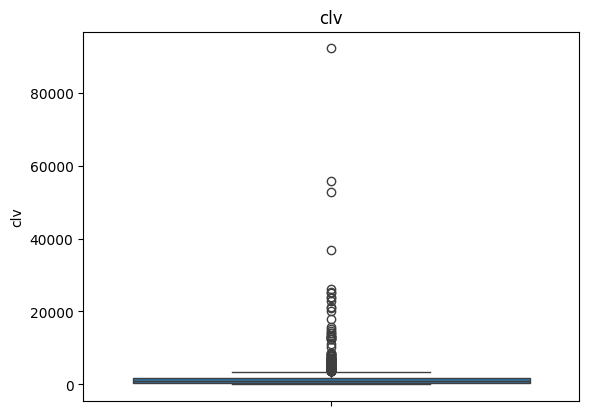

In [140]:
for col in cltv_6_month_final.columns:
    plt.title(col)
    sns.boxplot(cltv_6_month_final[col])
    plt.show()

### 2. Task (2. Görev): CLTV Analysis Consisting of Different Time Periods (Farklı Zaman Periyotlarından Oluşan CLTV Analizi)

---

- **Step 1:** *Calculate 1-month and 12-month CLTV for 2010-2011 UK customers.*

  - (**Adım 1:** *2010-2011 UK müşterileri için 1 aylık ve 12 aylık CLTV hesaplayınız.*)

---

In [141]:
cltv_UK_df, cltv_uk_1_month = cltv_p(df_UK, month=1)

In [142]:
cltv_UK_df = cltv_UK_df.reset_index()

In [143]:
cltv_1_month_final = cltv_UK_df.merge(cltv_uk_1_month, on='Customer ID', how='left')

In [144]:
cltv_UK_df, cltv_uk_12_month = cltv_p(df_UK, month=12)

In [145]:
cltv_UK_df = cltv_UK_df.reset_index()

In [146]:
cltv_12_month_final = cltv_UK_df.merge(cltv_uk_12_month, on='Customer ID', how='left')

---

- **Step 2:** *Analyze the 10 people with the highest CLTV in 1 month and the 10 people with the highest CLTV in 12 months.*

  - (**Adım 2:** *1 aylık CLTV'de en yüksek olan 10 kişi ile 12 aylık'taki en yüksek 10 kişiyi analiz ediniz*)

---

In [147]:
cltv_1_month_final.sort_values(by='clv', ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,clv
2486,18102.000,52.286,52.571,60,3859.739,16025.707
589,14096.000,13.857,14.571,17,3163.588,9869.301
2184,17450.000,51.286,52.571,46,2863.275,9184.277
2213,17511.000,52.857,53.429,31,2933.943,6420.410
1804,16684.000,50.429,51.286,28,2209.969,4545.907
406,13694.000,52.714,53.429,50,1275.700,4382.993
1485,16000.000,0.000,0.429,3,2335.120,4365.549
587,14088.000,44.571,46.143,13,3864.555,4361.008
1173,15311.000,53.286,53.429,91,667.779,4099.863
133,13089.000,52.286,52.857,97,606.362,3991.668


In [148]:
cltv_1_month_final.sort_values(by='clv', ascending=False).head(10).describe([0.05, 0.25, 0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,60%,70%,75%,80%,85%,90%,95%,99%,max
Customer ID,10.000,15602.500,1802.438,13089.000,13361.250,14090.000,15655.500,16273.600,16913.800,17258.500,17462.200,17489.650,17570.100,17836.050,18048.810,18102.000
recency,10.000,42.357,19.120,0.000,6.236,46.036,51.786,52.286,52.414,52.607,52.743,52.807,52.900,53.093,53.247,53.286
T,10.000,43.071,19.165,0.429,6.793,47.429,52.571,52.686,53.029,53.286,53.429,53.429,53.429,53.429,53.429,53.429
frequency,10.000,43.600,31.813,3.000,7.500,19.750,38.500,47.600,53.000,57.500,66.200,80.150,91.600,94.300,96.460,97.000
monetary,10.000,2378.003,1196.096,606.362,634.000,1509.268,2599.197,2891.542,3002.837,3106.177,3302.818,3616.086,3860.221,3862.388,3864.121,3864.555
clv,10.000,6724.668,3919.778,3991.668,4040.356,4362.144,4464.450,5295.708,7249.570,8493.310,9321.282,9629.543,10484.942,13255.324,15471.630,16025.707


In [149]:
cltv_12_month_final.sort_values(by='clv', ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,clv
2486,18102.000,52.286,52.571,60,3859.739,176129.037
589,14096.000,13.857,14.571,17,3163.588,105044.445
2184,17450.000,51.286,52.571,46,2863.275,100931.572
2213,17511.000,52.857,53.429,31,2933.943,70572.714
1804,16684.000,50.429,51.286,28,2209.969,49920.554
406,13694.000,52.714,53.429,50,1275.700,48185.724
587,14088.000,44.571,46.143,13,3864.555,47749.579
1173,15311.000,53.286,53.429,91,667.779,45078.950
1485,16000.000,0.000,0.429,3,2335.120,44563.162
133,13089.000,52.286,52.857,97,606.362,43879.417


In [150]:
cltv_12_month_final.sort_values(by='clv', ascending=False).head(10).describe([0.05, 0.25, 0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,60%,70%,75%,80%,85%,90%,95%,99%,max
Customer ID,10.000,15602.500,1802.438,13089.000,13361.250,14090.000,15655.500,16273.600,16913.800,17258.500,17462.200,17489.650,17570.100,17836.050,18048.810,18102.000
recency,10.000,42.357,19.120,0.000,6.236,46.036,51.786,52.286,52.414,52.607,52.743,52.807,52.900,53.093,53.247,53.286
T,10.000,43.071,19.165,0.429,6.793,47.429,52.571,52.686,53.029,53.286,53.429,53.429,53.429,53.429,53.429,53.429
frequency,10.000,43.600,31.813,3.000,7.500,19.750,38.500,47.600,53.000,57.500,66.200,80.150,91.600,94.300,96.460,97.000
monetary,10.000,2378.003,1196.096,606.362,634.000,1509.268,2599.197,2891.542,3002.837,3106.177,3302.818,3616.086,3860.221,3862.388,3864.121,3864.555
clv,10.000,73205.515,43037.873,43879.417,44187.102,45746.607,49053.139,58181.418,79680.371,93341.857,101754.146,103604.939,112152.904,144140.971,169731.424,176129.037


### 3. Task (3. Görev): Segmentation and Action Recommendations (Segmentasyon ve Aksiyon Önerileri)

---

- **Step 1:** *For 2010-2011 UK customers, divide all your customers into 4 groups (segments) according to 6-month CLTV and add the group names to the data set.*

  - (**Adım 1:** *2010-2011 UK müşterileri için 6 aylık CLTV'ye göre tüm müşterilerinizi 4 gruba (segmente) ayırınız ve grup isimlerini veri setine  ekleyiniz.*)
 
---

In [151]:
cltv_6_month_final['segment'] = pd.qcut(cltv_6_month_final['clv'], 4, labels = ['D', 'C', 'B', 'A'])

In [152]:
cltv_6_month_final.sort_values(by='clv', ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,clv,segment
2486,18102.000,52.286,52.571,60,3859.739,92215.234,A
589,14096.000,13.857,14.571,17,3163.588,55726.778,A
2184,17450.000,51.286,52.571,46,2863.275,52846.108,A
2213,17511.000,52.857,53.429,31,2933.943,36947.208,A
1804,16684.000,50.429,51.286,28,2209.969,26146.294,A
406,13694.000,52.714,53.429,50,1275.700,25224.935,A
587,14088.000,44.571,46.143,13,3864.555,25041.839,A
1485,16000.000,0.000,0.429,3,2335.120,23975.522,A
1173,15311.000,53.286,53.429,91,667.779,23597.165,A
133,13089.000,52.286,52.857,97,606.362,22971.584,A


In [161]:
cltv_6_month_final[[col for col in cltv_6_month_final.columns if 'Cust' not in col]].groupby('segment').agg({'count', 'mean', 'sum'})

recency                      T              frequency                monetary                       clv               
              sum count   mean       sum count   mean       sum count   mean        sum count    mean         sum count     mean
segment                                                                                                                         
D       14191.000   643 22.070 26077.429   643 40.556      1973   643  3.068 115025.751   643 178.889  173965.218   643  270.552
C       19795.143   642 30.834 24472.143   642 38.119      2561   642  3.989 167392.179   642 260.735  457462.576   642  712.559
B       19166.286   642 29.854 22551.571   642 35.127      3504   642  5.458 226502.355   642 352.807  818080.289   642 1274.268
A       20219.429   643 31.445 22189.429   643 34.509      7258   643 11.288 380377.590   643 591.567 2477738.995   643 3853.404

---

- **Step 2:** *Make brief 6-month action suggestions to the management for 2 groups you choose among 4 groups.*

  - (**Adım 2:** *4 grup içerisinden seçeceğiniz 2 grup için yönetime kısa kısa 6 aylık aksiyon önerilerinde bulununuz.*)
 
---

---

- **Segment D:**
  - Recency average value is 20 weeks and T average value is 40 weeks, meaning customers have shopped for a short time and have not been active for 20 weeks. You can offer special promotions or discounts to customers in this segment to make them interesting again.
  - Since the shopping frequency and amount are low, we can encourage customers with loyalty programs or reward systems.
  - We can measure customer satisfaction and improve your service by sending surveys or feedback forms to customers.
---

- **Segment A:**
  - Recency average value is 31 and T average value is 34 weeks, meaning customers have been shopping for a long time and have only been inactive for 3 weeks.
  - Shopping frequencies and shopping amounts are very high.
  - We can increase customer satisfaction and strengthen long-term loyalty with tailored services, product recommendations and personalized experiences.
 
---

---

- **Segment D:**

  - Recency ortalama değeri 20 hafta ve T ortalama değeri 40 hafta yani müşteriler kısa süreli alışveriş yapmış ve 20 haftadır aktif değiller. Bu segmentteki müşterilere tekrar ilgi çekici hale getirmek adına özel promosyonlar veya indirimler sunabilirsiniz.
  - Alışveriş sıklığı ve tutarı düşük olduğu için, sadakat programları veya ödüllendirme sistemleriyle müşterileri teşvik edebiliriz.
  - Müşterilere anketler veya geri bildirim formları göndererek memnuniyetlerini ölçebilir ve hizmetinizi geliştirebiliriz.
 
---

- **Segment A:**

  - Recency ortalama değeri 31 ve T ortalama değeri 34 hafta yani müşteriler uzun süreli alışveriş yapmış ve sadece 3 haftadır aktif değiller.
  - Alışveriş sıklıkları ve alışveriş tutarları çok yüksek.
  - Özel hizmetler, ürün önerileri ve kişiselleştirilmiş deneyimlerle müşteri memnuniyetini artırabilir ve uzun vadeli sadakati güçlendirebiliriz.
 
---

## Preparation of the Entire Process with a Single Function (Tüm Sürecin Tek Fonksiyonla Hazırlanması)

In [214]:
df['Country'].unique()

array(['UK', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway',
       'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands',
       'Denmark', 'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece',
       'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [215]:
def create_cltv_p(dataframe, month=6,  country_choice=False, country = 'United Kingdom',
                  excel_cltv_p=False, csv_cltv_p=False,
                  excel_A=False, csv_A=False, excel_B=False, csv_B=False, 
                  excel_C=False, csv_C=False, excel_D=False, csv_D=False):


# -----------------------------------------------------------------------------------------------------------------------------------------------------#
### FUNCTION DESCRIPTION ###
# dataframe = data set
# month = "CLTV" is the desired duration of the forecast (in months) (The default month is 6)
# If you want to calculate CLTV for customers in a specific country, 
# you need to set 'country_choice=True' and specify the desired country name in the 'country' parameter. (The default country name is 'United Kingdom').
# If you want to perform calculations for all countries, do not change the 'country_choice' and 'country' parameters.
# Set the segment and file type you want to save to "True". If you don't want it, don't change it.
# -----------------------------------------------------------------------------------------------------------------------------------------------------#



    # Country Choice
    if country_choice:
        dataframe = dataframe[dataframe['Country'].str.contains(country, na=False)]
    
    # 1. Data Pre-processing    
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe['Invoice'].str.contains('C', na=False)]
    dataframe = dataframe[dataframe['Quantity'] > 0]
    dataframe = dataframe[dataframe['Price'] > 0]
             
    for col in ['Quantity', 'Price']:
        replace_with_thresholds(df, col, q1=0.01, q3=0.99)

    dataframe['TotalPrice'] = dataframe['Quantity'] * dataframe['Price']
    today_date = dt.datetime(2011, 12, 11)

    cltv_df = dataframe.groupby('Customer ID').agg(
        {'InvoiceDate': [lambda x: (x.max() - x.min()).days,
                         lambda x: (today_date - x.min()).days],
         'Invoice': lambda x: x.nunique(),
         'TotalPrice': lambda x: x.sum()})

    cltv_df.columns = cltv_df.columns.droplevel(0)
    cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
    cltv_df['monetary'] = cltv_df['monetary'] / cltv_df['frequency']
    cltv_df = cltv_df[(cltv_df['frequency'] > 1)]
    cltv_df['recency'] = cltv_df['recency'] / 7
    cltv_df['T'] = cltv_df['T'] / 7

    # 2. Establishing the BG-NBD Model
    bgf = BetaGeoFitter(penalizer_coef=0.001)
    bgf.fit(cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T'])

    # 3. Establishing the Gamma-Gamma Model
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'],
            cltv_df['monetary'])

    # 4. Calculation of CLTV with BG-NBD and GG model.

    cltv = ggf.customer_lifetime_value(bgf,
                                       cltv_df['frequency'],
                                       cltv_df['recency'],
                                       cltv_df['T'],
                                       cltv_df['monetary'],
                                       time = month,
                                       freq = 'W',
                                       discount_rate = 0.01)


    
    cltv = cltv.reset_index()
    cltv_final= cltv_df.merge(cltv, on='Customer ID', how = 'left')
    cltv_final['segment'] = pd.qcut(cltv_final['clv'], 4, labels = ['D', 'C', 'B', 'A'])

    # Save CLTV Prediction
    if excel_cltv_p:
        cltv_final.to_excel('CLTV_Prediction.xlsx', index=False)

    if csv_cltv_p:
        cltv_final.to_csv('CLTV_Prediction.csv', index=False)
    
    # Save Segment A
    cltv_p_A_id = cltv_final[cltv_final['segment'].str.contains('A')]['Customer ID']
    
    if excel_A:
        cltv_p_A_id.to_excel('Segment_A_id.xlsx', index=False)
        
    if csv_A:
        cltv_p_A_id.to_csv('Segment_A_id.csv', index=False)

    # Save Segment B
    cltv_p_B_id = cltv_final[cltv_final['segment'].str.contains('B')]['Customer ID']
    
    if excel_B:
        cltv_p_B_id.to_excel('Segment_B_id.xlsx', index=False)
        
    if csv_B:
        cltv_p_B_id.to_csv('Segment_B_id.csv', index=False)

    # Save Segment C
    cltv_p_C_id = cltv_final[cltv_final['segment'].str.contains('C')]['Customer ID']
    
    if excel_C:
        cltv_p_C_id.to_excel('Segment_C_id.xlsx', index=False)
        
    if csv_C:
        cltv_p_C_id.to_csv('Segment_C_id.csv', index=False)

    # Save Segment D
    cltv_p_D_id = cltv_final[cltv_final['segment'].str.contains('D')]['Customer ID']
    
    if excel_D:
        cltv_p_D_id.to_excel('Segment_D_id.xlsx', index=False)
        
    if csv_D:
        cltv_p_D_id.to_csv('Segment_D_id.csv', index=False)
        
        
    return cltv_final

In [216]:
df_test = df_.copy()

In [217]:
cltv_test = create_cltv_p(df_test, month=6,  country_choice=True, country = 'United Kingdom', 
                          excel_cltv_p=True, csv_cltv_p=True,
                          excel_A=True, csv_A=True, excel_B=True, csv_B=True, 
                          excel_C=True, csv_C=True, excel_D=True, csv_D=True)

In [218]:
cltv_test.shape

(2570, 7)

In [219]:
cltv_test.head()

,Customer ID,recency,T,frequency,monetary,clv,segment
0,12747.000,52.286,52.857,11,381.455,1937.224,A
1,12748.000,53.143,53.429,209,161.338,12908.063,A
2,12749.000,29.857,30.571,5,818.176,3462.380,A
3,12820.000,46.143,46.714,4,235.585,632.130,C
4,12822.000,2.286,12.571,2,474.440,1613.196,B


In [220]:
testo = create_cltv_p(df_test, month=6)

In [221]:
testo.shape

(2845, 7)